# <span style="color:#6c42f5;font-size:9vw;font-weight:800;text-shadow:2px 2px 4px #aaa">Linear Regression</span>
# <span style="font-size:6vw;font-weight:800;text-shadow:2px 2px 10px #aaa">One Days Development Programe</span>
## <span style="font-size:4vw;font-weight:800">Alok Pandey <br> Ashvini Jangid</span>
## <span style="font-size:4vw;font-weight:800"><a href="https://imjangid.xyz">ashvinijangid@gmail.com</a>

# Import libs

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate Data 

In [2]:
x, y = make_regression(100, noise=4, n_features=1)
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

# Plotting

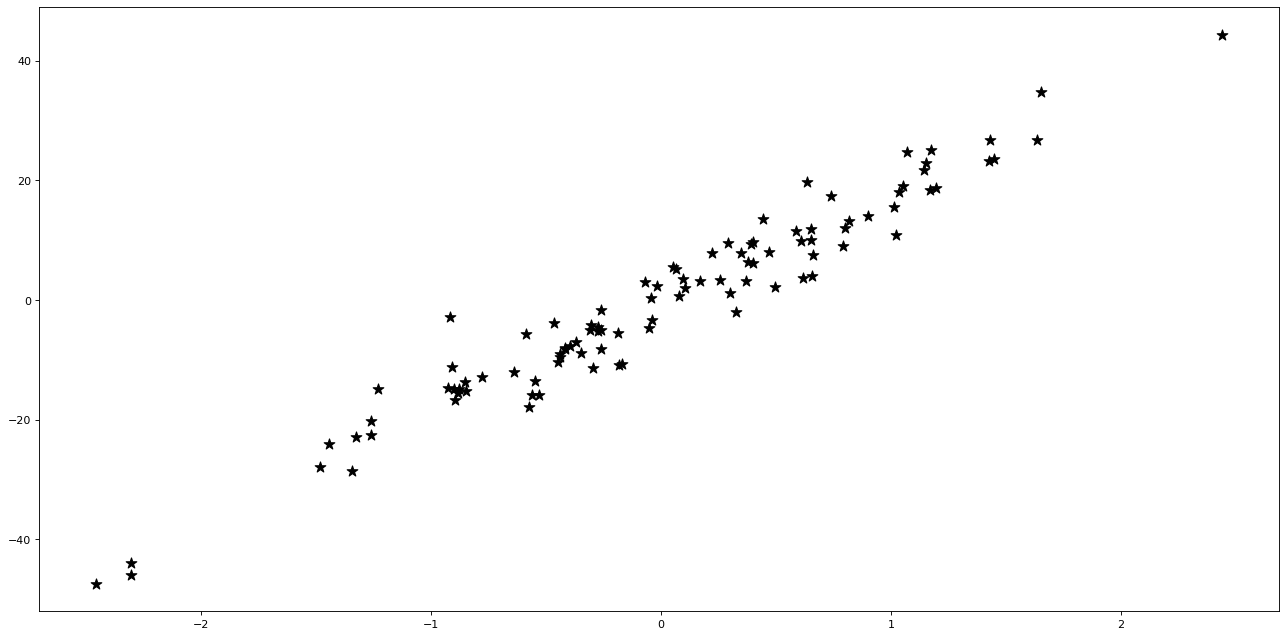

In [3]:
def plot(x, y, label=""):
    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_facecolor("white")
    ax.scatter(x, y, c="k", marker="*", s=100, label=label)
    return ax


plot(x, y)

# Regression

In [4]:
def calculate_weight(x, y, epoch):
    print("Iteration", "Error", "Bias", "\tWeight", sep="\t\t\t")
    x = np.insert(x, 0, 1, axis=1)
    θ = np.zeros(len(x[0]))
    m = y.size
    print_interval = 1

    lr = 0.01

    for i in range(epoch):

        h = (x @ θ).reshape(-1, 1)

        error = ((y - h)**2).mean()

        θ = θ - lr * (1 / m) * (x.T.dot(h - y)).reshape(-1)

        if not i % print_interval:
            print_interval *= 2
            print(str(i).center(10), error, θ[0], θ[1], sep="\t\t")

    print(str(i+1).center(10),error, θ[0], θ[1], sep="\t\t")
    return θ


def Predict(p, θ):
    x = np.insert(p, 0, 1, axis=0)
    return x.dot(θ)

## Training Model

In [5]:
weight = calculate_weight(X, Y, 1000)

Iteration			Error			Bias				Weight
    0     		268.1511026280135		-0.0035941643303316704		0.14198223369037244
    2     		260.17813501381124		-0.010693863590424693		0.4225669788640348
    4     		252.45588381966544		-0.017677020026219042		0.6987049807498198
    8     		237.73224266192273		-0.031301380692074825		1.237921526646099
    16    		210.96284273950704		-0.05723425753680694		2.2660206311712843
    32    		166.6735956213575		-0.10422719494782597		4.135235864263401
    64    		105.81069300741287		-0.18148324546547812		7.227814310055708
   128    		47.41342714848932		-0.2864195443015672		11.477709995366016
   256    		18.8501123064177		-0.3851435347030792		15.555486441028412
   512    		14.67575897085086		-0.4320694181840739		17.550046029769046
   1000   		14.604701745596763		-0.4386779450362729		17.84044717776967


## Predecting Value

In [6]:
y_cap = [Predict(i, weight) for i in X]

## Plotting The Result

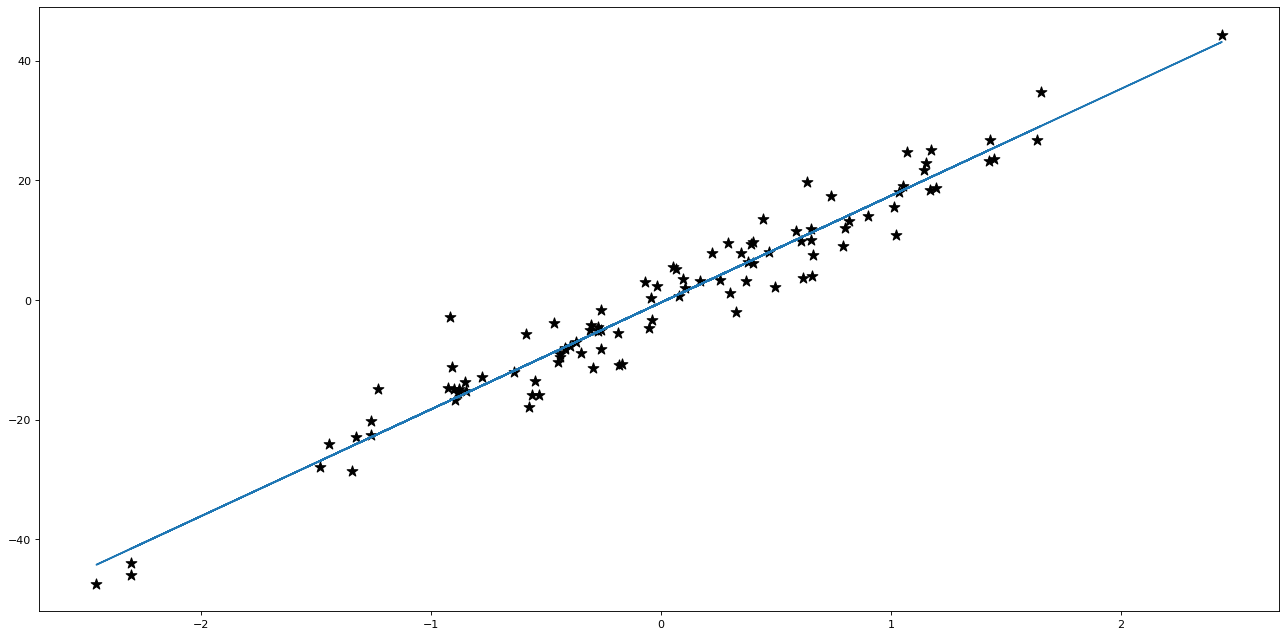

In [7]:
ax = plot(X, Y)
ax.plot(X,y_cap)

In [8]:
Predict([1], weight)

17.401769232733397